In [66]:
import pandas as pd 
import seaborn as sns  # um Grafiken aus long datasets zu erstellen 
import matplotlib.pyplot as plt
import plotly.express as px


# Übung 1 - Exercise 16: 
url = "https://api.db.nomics.world/v22/series/AMECO/UDGG.csv?dimensions=%7B%22freq%22%3A%5B%22a%22%5D%2C%22unit%22%3A%5B%22percentage-of-gdp-at-current-prices-excessive-deficit-procedure%22%5D%2C%22geo%22%3A%5B%22deu%22%2C%22ita%22%2C%22fra%22%2C%22esp%22%5D%7D&limit=1000"

df_debt = pd.read_csv(url)
df_debt

#df_debt.to_csv('Data/20241128_df_debt.csv', sep = ",", index = False)

,period,Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Germany (AMECO/UDGG/DEU.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Spain (AMECO/UDGG/ESP.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – France (AMECO/UDGG/FRA.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Italy (AMECO/UDGG/ITA.1.0.319.0.UDGG)
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785
...,...,...,...,...,...
61,2021,68.9861,116.8408,112.9733,147.1270
62,2022,66.0769,111.6180,111.9182,140.5217
63,2023,63.6391,107.6521,110.6433,137.3104
64,2024,62.9344,105.5079,112.4088,138.6244


In [2]:
new_names = {df_debt.columns[0]: 'Year',
            df_debt.columns[1]:'Germany',
            df_debt.columns[2]: 'Spain',
            df_debt.columns[3]: 'France',
            df_debt.columns[4]: "Italy"}

df_debt.rename(columns = new_names, inplace  = True) 
df_debt

,Year,Germany,Spain,France,Italy
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785
...,...,...,...,...,...
61,2021,68.9861,116.8408,112.9733,147.1270
62,2022,66.0769,111.6180,111.9182,140.5217
63,2023,63.6391,107.6521,110.6433,137.3104
64,2024,62.9344,105.5079,112.4088,138.6244


In [3]:
df_debt.isna().sum()

Year        0
Germany    35
Spain      35
France     35
Italy       0
dtype: int64

In [4]:
df_debt.dropna()
df_debt.reset_index(drop = True, inplace = True)  # sonst beginnt der Index bei 35 oder irgendeiner Zahl, nicht bei 0 

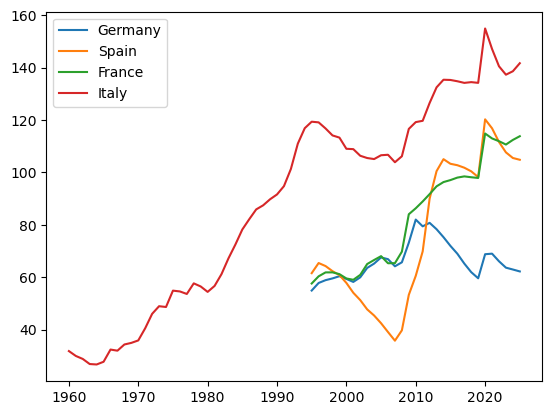

In [5]:
x = df_debt["Year"]
countries = ["Germany","Spain","France","Italy"]

for country in countries: 
    plt.plot(x, df_debt[country], label = country) 

plt.legend()

In [6]:
# From wide to long format (panel dataset)
df_debt_long = pd.melt(
    df_debt,
    id_vars = 'Year',  #
    var_name = 'Country',
    value_name = 'Debt ratio'
)


<Axes: xlabel='Year', ylabel='Debt ratio'>

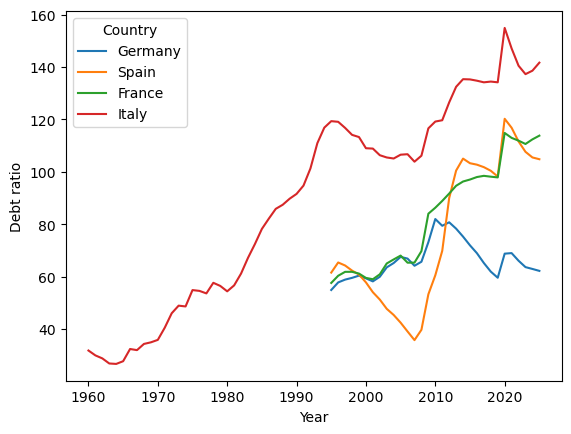

In [7]:
sns.lineplot(x= 'Year', y = 'Debt ratio', hue = 'Country', data = df_debt_long)

In [8]:
# from long to wide 
df_debt_wide = pd.pivot(
    df_debt_long,
    index = 'Year', 
    columns = 'Country', 
    values = 'Debt ratio'
).reset_index()
df_debt_wide  # 'Country' in erster Spalte ist Index 

Country,Year,France,Germany,Italy,Spain
0,1960,NaN,NaN,31.7953,NaN
1,1961,NaN,NaN,29.9336,NaN
2,1962,NaN,NaN,28.7905,NaN
3,1963,NaN,NaN,26.8476,NaN
4,1964,NaN,NaN,26.6785,NaN
...,...,...,...,...,...
61,2021,112.9733,68.9861,147.1270,116.8408
62,2022,111.9182,66.0769,140.5217,111.6180
63,2023,110.6433,63.6391,137.3104,107.6521
64,2024,112.4088,62.9344,138.6244,105.5079


In [9]:
# Übung 2 - Exercise 17: 


In [10]:
df_gapminder = pd.read_csv('Data/gapminder.csv', sep = ",", decimal = ".")
df_gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [11]:
df_gapminder.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [12]:
country_list = df_gapminder['country'].unique()
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [13]:
len(country_list)
# alternative: 
# country_count = country_list['country'].nunique()

142

In [14]:
# count years per country 
years_count = df_gapminder.groupby('country')['year'].count() 
years_count

country
Afghanistan           12
Albania               12
Algeria               12
Angola                12
Argentina             12
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen, Rep.           12
Zambia                12
Zimbabwe              12
Name: year, Length: 142, dtype: int64

In [15]:
countries_cont_2007 = df_gapminder[df_gapminder["year"] == 2007].groupby(['continent'])['country'].count()
countries_cont_2007

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [16]:
df_germany = df_gapminder[df_gapminder.country == 'Germany'].select_dtypes(include = 'number').reset_index()
df_germany

,index,year,lifeExp,pop,gdpPercap
0,564,1952,67.500,69145952,7144.114393
1,565,1957,69.100,71019069,10187.826650
2,566,1962,70.300,73739117,12902.462910
3,567,1967,70.800,76368453,14745.625610
4,568,1972,71.000,78717088,18016.180270
5,569,1977,72.500,78160773,20512.921230
6,570,1982,73.800,78335266,22031.532740
7,571,1987,74.847,77718298,24639.185660
8,572,1992,76.070,80597764,26505.303170
9,573,1997,77.340,82011073,27788.884160


In [17]:
df_germany.to_csv("Data/germany_gapminder.csv", sep = ",", decimal = ".", index = False)

In [18]:
# Zeitlich Durchschnittswerte für Bevölkerung, BIP pro Kopf und Lebenserwartung nach Land 
df_gapminder.groupby('country')[['lifeExp','pop','gdpPercap']].mean()

,lifeExp,pop,gdpPercap
country,,,
Afghanistan,37.478833,1.582372e+07,802.674598
Albania,68.432917,2.580249e+06,3255.366633
Algeria,59.030167,1.987541e+07,4426.025973
Angola,37.883500,7.309390e+06,3607.100529
Argentina,69.060417,2.860224e+07,8955.553783
...,...,...,...
Vietnam,57.479500,5.456857e+07,1017.712615
West Bank and Gaza,60.328667,1.848606e+06,3759.996781
"Yemen, Rep.",46.780417,1.084319e+07,1569.274672


In [19]:
df_mean = df_gapminder.groupby('continent')[['lifeExp', 'pop', 'gdpPercap']].mean()
df_mean['Variable'] = "Mean"

df_median = df_gapminder.groupby('continent')[['lifeExp', 'pop', 'gdpPercap']].median()
df_median['Variable'] = "Median"

df_min = df_gapminder.groupby('continent')[['lifeExp', 'pop', 'gdpPercap']].min()
df_min['Variable'] = "Min"

df_max = df_gapminder.groupby('continent')[['lifeExp', 'pop', 'gdpPercap']].max()
df_max['Variable'] = "Max"

df_summary = pd.concat([df_mean, df_median, df_min, df_max], axis=0).sort_index().reset_index()
df_summary


,continent,lifeExp,pop,gdpPercap,Variable
0,Africa,48.865330,9.916003e+06,2193.754578,Mean
1,Africa,47.792000,4.579311e+06,1192.138217,Median
2,Africa,23.599000,6.001100e+04,241.165876,Min
3,Africa,76.442000,1.350312e+08,21951.211760,Max
4,Americas,64.658737,2.450479e+07,7136.110356,Mean
5,Americas,67.048000,6.227510e+06,5465.509853,Median
6,Americas,37.579000,6.628500e+05,1201.637154,Min
7,Americas,80.653000,3.011399e+08,42951.653090,Max
8,Asia,60.064903,7.703872e+07,7902.150428,Mean
9,Asia,82.603000,1.318683e+09,113523.132900,Max


In [20]:
# Entwicklung der lebenserwartung 
df_p1 = pd.DataFrame({
    'Minimum': df_gapminder.groupby('year')['lifeExp'].min(),
    'Maximum': df_gapminder.groupby('year')['lifeExp'].max(),
    'Median': df_gapminder.groupby('year')['lifeExp'].median()
}).reset_index()

df_p1

,year,Minimum,Maximum,Median
0,1952,28.801,72.670,45.1355
1,1957,30.332,73.470,48.3605
2,1962,31.997,73.680,50.8810
3,1967,34.020,74.160,53.8250
4,1972,35.400,74.720,56.5300
5,1977,31.220,76.110,59.6720
6,1982,38.445,77.110,62.4415
7,1987,39.906,78.670,65.8340
8,1992,23.599,79.360,67.7030
9,1997,36.087,80.690,69.3940


In [78]:
df_p2 = df_gapminder[df_gapminder.country == "Germany"][['year','lifeExp']].rename(columns = {"lifeExp":'Germany'})
df_p2

,year,Germany
564,1952,67.500
565,1957,69.100
566,1962,70.300
567,1967,70.800
568,1972,71.000
569,1977,72.500
570,1982,73.800
571,1987,74.847
572,1992,76.070
573,1997,77.340


In [80]:
df_graph = df_p1.merge(df_p2, how = 'inner', on = 'year')
df_graph

,year,Minimum,Maximum,Median,Germany
0,1952,28.801,72.670,45.1355,67.500
1,1957,30.332,73.470,48.3605,69.100
2,1962,31.997,73.680,50.8810,70.300
3,1967,34.020,74.160,53.8250,70.800
4,1972,35.400,74.720,56.5300,71.000
5,1977,31.220,76.110,59.6720,72.500
6,1982,38.445,77.110,62.4415,73.800
7,1987,39.906,78.670,65.8340,74.847
8,1992,23.599,79.360,67.7030,76.070
9,1997,36.087,80.690,69.3940,77.340


In [ ]:
# From wide to long format 

In [82]:
df_graph_long = pd.melt(
    df_graph,
    id_vars = 'year',  #
    var_name = 'variable',
    value_name = 'value'
)

df_graph_long


,year,variable,value
0,1952,Minimum,28.8010
1,1957,Minimum,30.3320
2,1962,Minimum,31.9970
3,1967,Minimum,34.0200
4,1972,Minimum,35.4000
5,1977,Minimum,31.2200
6,1982,Minimum,38.4450
7,1987,Minimum,39.9060
8,1992,Minimum,23.5990
9,1997,Minimum,36.0870


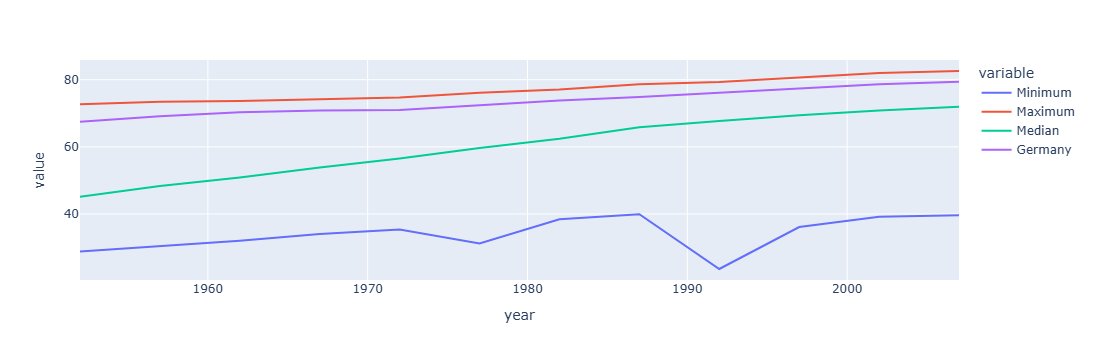

In [86]:
px.line(df_graph_long, y = "value", x = "year", color = "variable")


In [88]:
file_names = ['AAPL', 'GOOG', 'META', 'MSFT']

data_frames = {}

for file_name in file_names:
    file_path = f'Data/{file_name}.csv'
    data_frames[file_name] = pd.read_csv(file_path)
    
aapl_data = data_frames['AAPL'][['Date', 'Close']].rename(
    columns = {'Close':'AAPL'})
goog_data = data_frames['GOOG'][['Date', 'Close']].rename(
    columns = {'Close':'GOOG'})
meta_data = data_frames['META'][['Date', 'Close']].rename(
    columns = {'Close':'META'})
msft_data = data_frames['MSFT'][['Date', 'Close']].rename(
    columns = {'Close':'MSFT'})

In [94]:
merged_data_AG = pd.merge(aapl_data, goog_data, on='Date', how='outer')
merged_data_AGM = pd.merge(merged_data_AG, meta_data, on='Date', how='outer')
df_final = pd.merge(merged_data_AGM, msft_data, on='Date', how='outer').reset_index(drop=True)
df_final.head()

,Date,AAPL,GOOG,META,MSFT
0,1980-12-12,0.128348,NaN,NaN,NaN
1,1980-12-15,0.121652,NaN,NaN,NaN
2,1980-12-16,0.112723,NaN,NaN,NaN
3,1980-12-17,0.115513,NaN,NaN,NaN
4,1980-12-18,0.118862,NaN,NaN,NaN


In [92]:
df_final.to_csv("Data/stocks.csv", sep = ",", decimal = ".")